<a href="https://colab.research.google.com/github/ceyxasm/ml/blob/main/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

More dimensions the training set has, greater is the risk of overfitting it.
There are many approaches of dimensionality reduction
1. Projection
2. Manifold Learning



In [ ]:
'''Principal Component Analysis'''
#for visualization lets say

import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
##PCA is influenced by Scale so standardizing is a must

from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

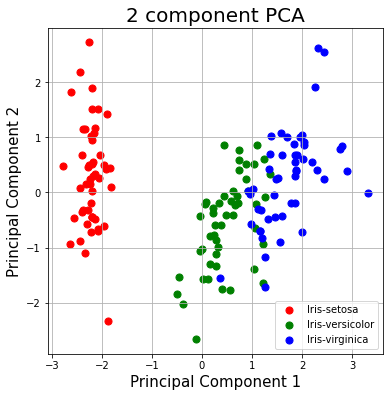

In [ ]:
#droping from 4D to 2D
from sklearn.decomposition import PCA #KernelPCA can even perform manifold learning
import matplotlib.pyplot as plt

pca = PCA(n_components=2) ##if we pass a float bw 0.0 and 1.0; it refers to the variane that needs to be preserved
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#plugging back y in 
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#to track the variance loss
print(pca.explained_variance_ratio_)
'''
although here we needed to drop to 2D(or maybe 3D), while learning this
 number could be different which could be analyzed using the 
explained_variance_ratio_'''

[0.72770452 0.23030523]


'\nalthough here we needed to drop to 2D(or maybe 3D), while learning this\n number could be different which could be analyzed using the \nexplained_variance_ratio_'

In [ ]:
##PCA for faster learning
'''ex: MNIST has 784 features which do be hella crazy'''
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

'''adding parameter: (solver="randomized"), uses a sto‐
chastic algorithm called Randomized PCA that quickly finds an approximation of the
first d principal components.'''

pca.fit(train_img)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

#and accordingly, our dimensions are reduced, preserving 95% var

In [ ]:
##last cell took forever to run

One problem with the preceding implementations of PCA is that they require the
whole training set to fit in memory in order for the algorithm to run. Fortunately,
Incremental PCA (IPCA) algorithms have been developed: you can split the training
set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is useful for large training sets, and also to apply PCA online

In [ ]:
from sklearn.decomposition import IncrementalPCA
import numpy as np

train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(train_img, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(train_img)


PCA is an unsupervized task, and therefore to hypertune it, we need to analyze the entire pipeline

Another indirect appraoch is to select the kernel that gives lowest reconstruction error.

But reconstruction is not straight forward especially with non-linear PCA

As 

original space----(kPCA)---> reduced space ---(reconstructed)---> feature space and not original space.

Solution:


```
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", 
                      fit_inverse_transform=True) 
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)
```




**Locally Linear Embedding**
It is a Manifold Non-linear Learning technique that does not rely
on projections like the previous algorithms. LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then
looking for a low-dimensional representation of the training set where these local
relationships are best preserved . This makes it particularly
good at unrolling twisted manifolds.

```
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)
```